# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

---
# TRABAJO PRÁCTICO ENTREGABLE - PARTE 2

## INTEGRANTES DEL GRUPO IV:
*   María Belén Acotto
*   Juan Ignacio Barrionuevo Galtier
*   Gonzalo Heredia Edelstein

---

## Importación de Librerías

In [1]:
import numpy as np
import pandas as pd

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [2]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TARGET   1854 non-null   int64  
 1   LOAN     1854 non-null   int64  
 2   MORTDUE  1854 non-null   float64
 3   VALUE    1854 non-null   float64
 4   YOJ      1854 non-null   float64
 5   DEROG    1854 non-null   float64
 6   DELINQ   1854 non-null   float64
 7   CLAGE    1854 non-null   float64
 8   NINQ     1854 non-null   float64
 9   CLNO     1854 non-null   float64
 10  DEBTINC  1854 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 159.5 KB


In [4]:
dataset.head()

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106


In [5]:
dataset.TARGET.value_counts()

0    1545
1     309
Name: TARGET, dtype: int64

Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

---

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1. El conjunto de datos **loan_data**, fue realizado con un departamento crediticio de un banco que quería automatizar el proceso de toma de decisiones para aprobar o no, un crédito hipotecario. Este dataset contiene información de referencia y rendimiento del préstamos de 5960 personas, siendo reducido a un total de 1854 filas con 11 variables de entrada. Entre las mismas, existe una variable binaria objetivo (TARGET), que indica si una persona terminó incumpliendo o siendo morosa.

2. La variable objetivo a predecir es TARGET. Esta variable es una variable binaria con 0 y 1 que significa:
    * 0: El cliente pagó el crédito.
    * 1: El cliente no pagó el crédito.


3. Para la predicción de la columna TARGET, contamos con 10 variables. A continuación, procedemos a la explicación de cada uno de ellas:
    * **LOAN**: Importe de la solicitud de préstamo
    * **MORTDUE**: Importe de la hipoteca actual
    * **VALUE**: Valor de la propiedad actual
    * **YOJ**: Años en el trabajo actual
    * **DEROG**: Número de informes derogatorios importantes
    * **DELINQ**: Número de líneas de crédito morosas
    * **CLAGE**: Antigüedad de la línea comercial más antigua en meses
    * **NINQ**: Número de líneas de crédito recientes
    * **CLNO**: Número de líneas de crédito
    * **DEBTINC**: Ratio de las deudas/ingresos


4. Los atributos que mas determinen la prediccion desde nuestro punto de vista, sin previo analisis, serian:
    * LOAN
    * MORTDUE
    * YOJ
    * CLNO
    * NINQ
    * DELINQ
    * DEBTINC

---

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

#### Entrenamiento SGDClassifier (Default)

In [6]:
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3, random_state=15))
clf.fit(X_train, y_train)
clf.get_params(deep = True) 

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('sgdclassifier', SGDClassifier(random_state=15))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'sgdclassifier': SGDClassifier(random_state=15),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'sgdclassifier__alpha': 0.0001,
 'sgdclassifier__average': False,
 'sgdclassifier__class_weight': None,
 'sgdclassifier__early_stopping': False,
 'sgdclassifier__epsilon': 0.1,
 'sgdclassifier__eta0': 0.0,
 'sgdclassifier__fit_intercept': True,
 'sgdclassifier__l1_ratio': 0.15,
 'sgdclassifier__learning_rate': 'optimal',
 'sgdclassifier__loss': 'hinge',
 'sgdclassifier__max_iter': 1000,
 'sgdclassifier__n_iter_no_change': 5,
 'sgdclassifier__n_jobs': None,
 'sgdclassifier__penalty': 'l2',
 'sgdclassifier__power_t': 0.5,
 'sgdclassifier__random_state': 15,
 'sgdclassifier__shuffle': True,
 'sgdclassifier__tol': 0.001,
 'sgdclassifier__validation_fraction': 0.1,
 '

In [7]:
score = clf.score(X_train, y_train)
print(f'Precisión en los datos de entrenamiento (score): {score}')

Precisión en los datos de entrenamiento (score): 0.851652056641942


#### Predicción SGDClassifier (Default) en Train

In [8]:
y_train_pred = clf.predict(X_train)

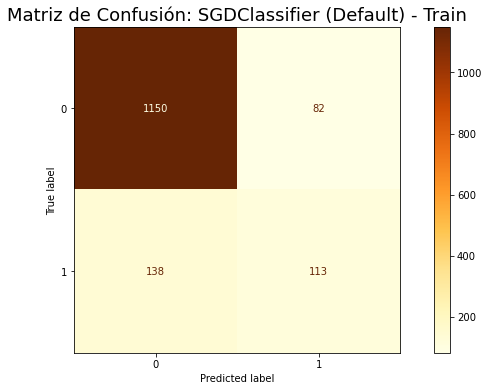

In [9]:
cm_train = confusion_matrix(y_train, y_train_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Matriz de Confusión: SGDClassifier (Default) - Train', fontsize=18)
disp.plot(cmap='YlOrBr', ax=ax)
plt.show()

In [10]:
# Evaluate val
text = "SGDClassifier (Default) - Reporte de clasificación del conjunto de entrenamiento" 
print(len(text)*"=")
print(text)
print(len(text)*"=")

cr = classification_report(y_train, y_train_pred)
print(cr)

SGDClassifier (Default) - Reporte de clasificación del conjunto de entrenamiento
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1232
           1       0.58      0.45      0.51       251

    accuracy                           0.85      1483
   macro avg       0.74      0.69      0.71      1483
weighted avg       0.84      0.85      0.84      1483



#### Predicción SGDClassifier (Default) en Test

In [11]:
y_test_pred = clf.predict(X_test)

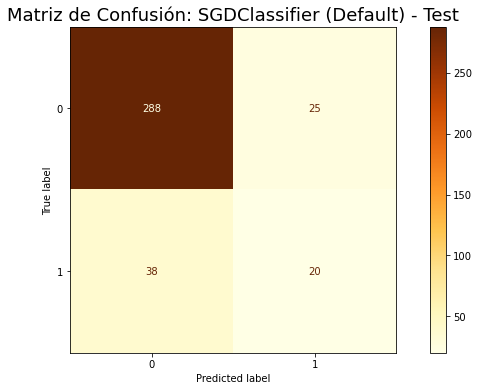

In [12]:
cm_test = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Matriz de Confusión: SGDClassifier (Default) - Test', fontsize=18)
disp.plot(cmap='YlOrBr', ax=ax)
plt.show()

In [13]:
# Evaluate val
text = "SGDClassifier (Default) - Reporte de clasificación del conjunto de evaluación" 
print(len(text)*"=")
print(text)
print(len(text)*"=")

cr = classification_report(y_test, y_test_pred)
print(cr)

SGDClassifier (Default) - Reporte de clasificación del conjunto de evaluación
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       313
           1       0.44      0.34      0.39        58

    accuracy                           0.83       371
   macro avg       0.66      0.63      0.64       371
weighted avg       0.81      0.83      0.82       371



### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

#### Entrenamiento SGDClassifier con GSCV

In [14]:
param_grid = {
    'sgdclassifier__loss': ['hinge', 'log', 'squared_hinge', 'modified_huber'],
    'sgdclassifier__penalty': ['l2', 'l1'],
    'sgdclassifier__alpha': [0.1, 0.01, 0.001, 0.0001],
    'sgdclassifier__epsilon': [0.1, 0.01, 0.001],
    'sgdclassifier__tol': [1e-2, 1e-3],
    'sgdclassifier__max_iter': [1000, 1500]
}

scaler = StandardScaler()
sgdc = SGDClassifier(random_state=15)
pipe = make_pipeline(scaler, sgdc)

grid = GridSearchCV(pipe, param_grid, cv = 5, refit = True, n_jobs = 3) 

In [15]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=15))]),
             n_jobs=3,
             param_grid={'sgdclassifier__alpha': [0.1, 0.01, 0.001, 0.0001],
                         'sgdclassifier__epsilon': [0.1, 0.01, 0.001],
                         'sgdclassifier__loss': ['hinge', 'log',
                                                 'squared_hinge',
                                                 'modified_huber'],
                         'sgdclassifier__max_iter': [1000, 1500],
                         'sgdclassifier__penalty': ['l2', 'l1'],
                         'sgdclassifier__tol': [0.01, 0.001]})

In [16]:
print(grid.best_params_) 

{'sgdclassifier__alpha': 0.001, 'sgdclassifier__epsilon': 0.1, 'sgdclassifier__loss': 'log', 'sgdclassifier__max_iter': 1000, 'sgdclassifier__penalty': 'l2', 'sgdclassifier__tol': 0.01}


In [17]:
score = grid.score(X_train, y_train)
print(f'Precisión en los datos de entrenamiento (score): {score}')

Precisión en los datos de entrenamiento (score): 0.8745785569790965


#### Predicción SGDClassifier GSCV - Train

In [18]:
y_train_pred = grid.predict(X_train)

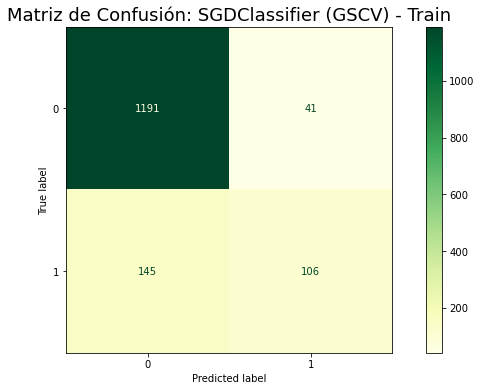

In [19]:
cm_train = confusion_matrix(y_train, y_train_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=grid.classes_)
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Matriz de Confusión: SGDClassifier (GSCV) - Train', fontsize=18)
disp.plot(cmap='YlGn', ax=ax)
plt.show()

In [20]:
# Evaluate val
text = "SGDClassifier - Reporte de clasificación del conjunto de entrenamiento" 
print(len(text)*"=")
print(text)
print(len(text)*"=")

cr = classification_report(y_train, y_train_pred)
print(cr)

SGDClassifier - Reporte de clasificación del conjunto de entrenamiento
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1232
           1       0.72      0.42      0.53       251

    accuracy                           0.87      1483
   macro avg       0.81      0.69      0.73      1483
weighted avg       0.86      0.87      0.86      1483



#### Predicción SGDClassifier GSCV - Test

In [21]:
y_test_pred = grid.predict(X_test)

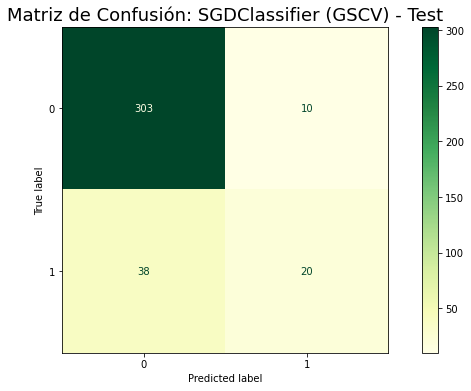

In [22]:
cm_test = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=grid.classes_)
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Matriz de Confusión: SGDClassifier (GSCV) - Test', fontsize=18)
disp.plot(cmap='YlGn', ax=ax)
plt.show()

In [23]:
# Evaluate val
text = "SGDClassifier - Reporte de clasificación del conjunto de evaluación" 
print(len(text)*"=")
print(text)
print(len(text)*"=")

cr = classification_report(y_test, y_test_pred)
print(cr)

SGDClassifier - Reporte de clasificación del conjunto de evaluación
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       313
           1       0.67      0.34      0.45        58

    accuracy                           0.87       371
   macro avg       0.78      0.66      0.69       371
weighted avg       0.85      0.87      0.85       371



### Conclusión SGDClassifier

El algorítmo de SGDClassifier implementa una rutina o clase de aprendizaje de descenso de gradiente estocástico simple que soporta diferentes funciones de pérdida y penalización para clasificar las distintas clases de nuestro conjunto de datos.

Al ejecutar nuestros modelos, se obtiene un **accuracy** bastante alto, lo cual nos indica que el número de predicciones correctas es del 87% aproximadamente. Este resultado es engañoso si miramos detenidamente nuestro conjunto de datos y el resultado de la matriz de confusión. En primera instancia, tenemos un dataset desbalanceado, lo cual puede traernos conflictos porque el algorítmo pesa más una clase que otra. Como segunda instancia, tanto en train como test, predice clientes que no pagaron como clientes que si lo van a hacer. La dificultad de esto, es que si nos queremos enfocar sobre qué cliente no cumplirá con los respectivos pagos, este modelo, no serviría. Como argumento a esto, observamos la baja probabilidad en el **recall** para nuestra clase 1.

Para aplicar el modelo sugerimos enfocarnos en el **recall** de los que si van a pagar, ya que según los resultados, observamos que el porcentaje de mal clasificados, es muy bajo.

---

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


#### Entrenamiento DecisionTreeClassifier (Default)

In [24]:
tree_clf = DecisionTreeClassifier(random_state=15)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=15)

Parametros que tomo en el default

In [25]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 15,
 'splitter': 'best'}

In [26]:
print(f'Profundidad del Árbol de Decisión: {tree_clf.get_depth()}')
print(f'Nro de Hojas del Árbol de Decisión: {tree_clf.get_n_leaves()}')

Profundidad del Árbol de Decisión: 22
Nro de Hojas del Árbol de Decisión: 142


Visualización del arbol de decisión

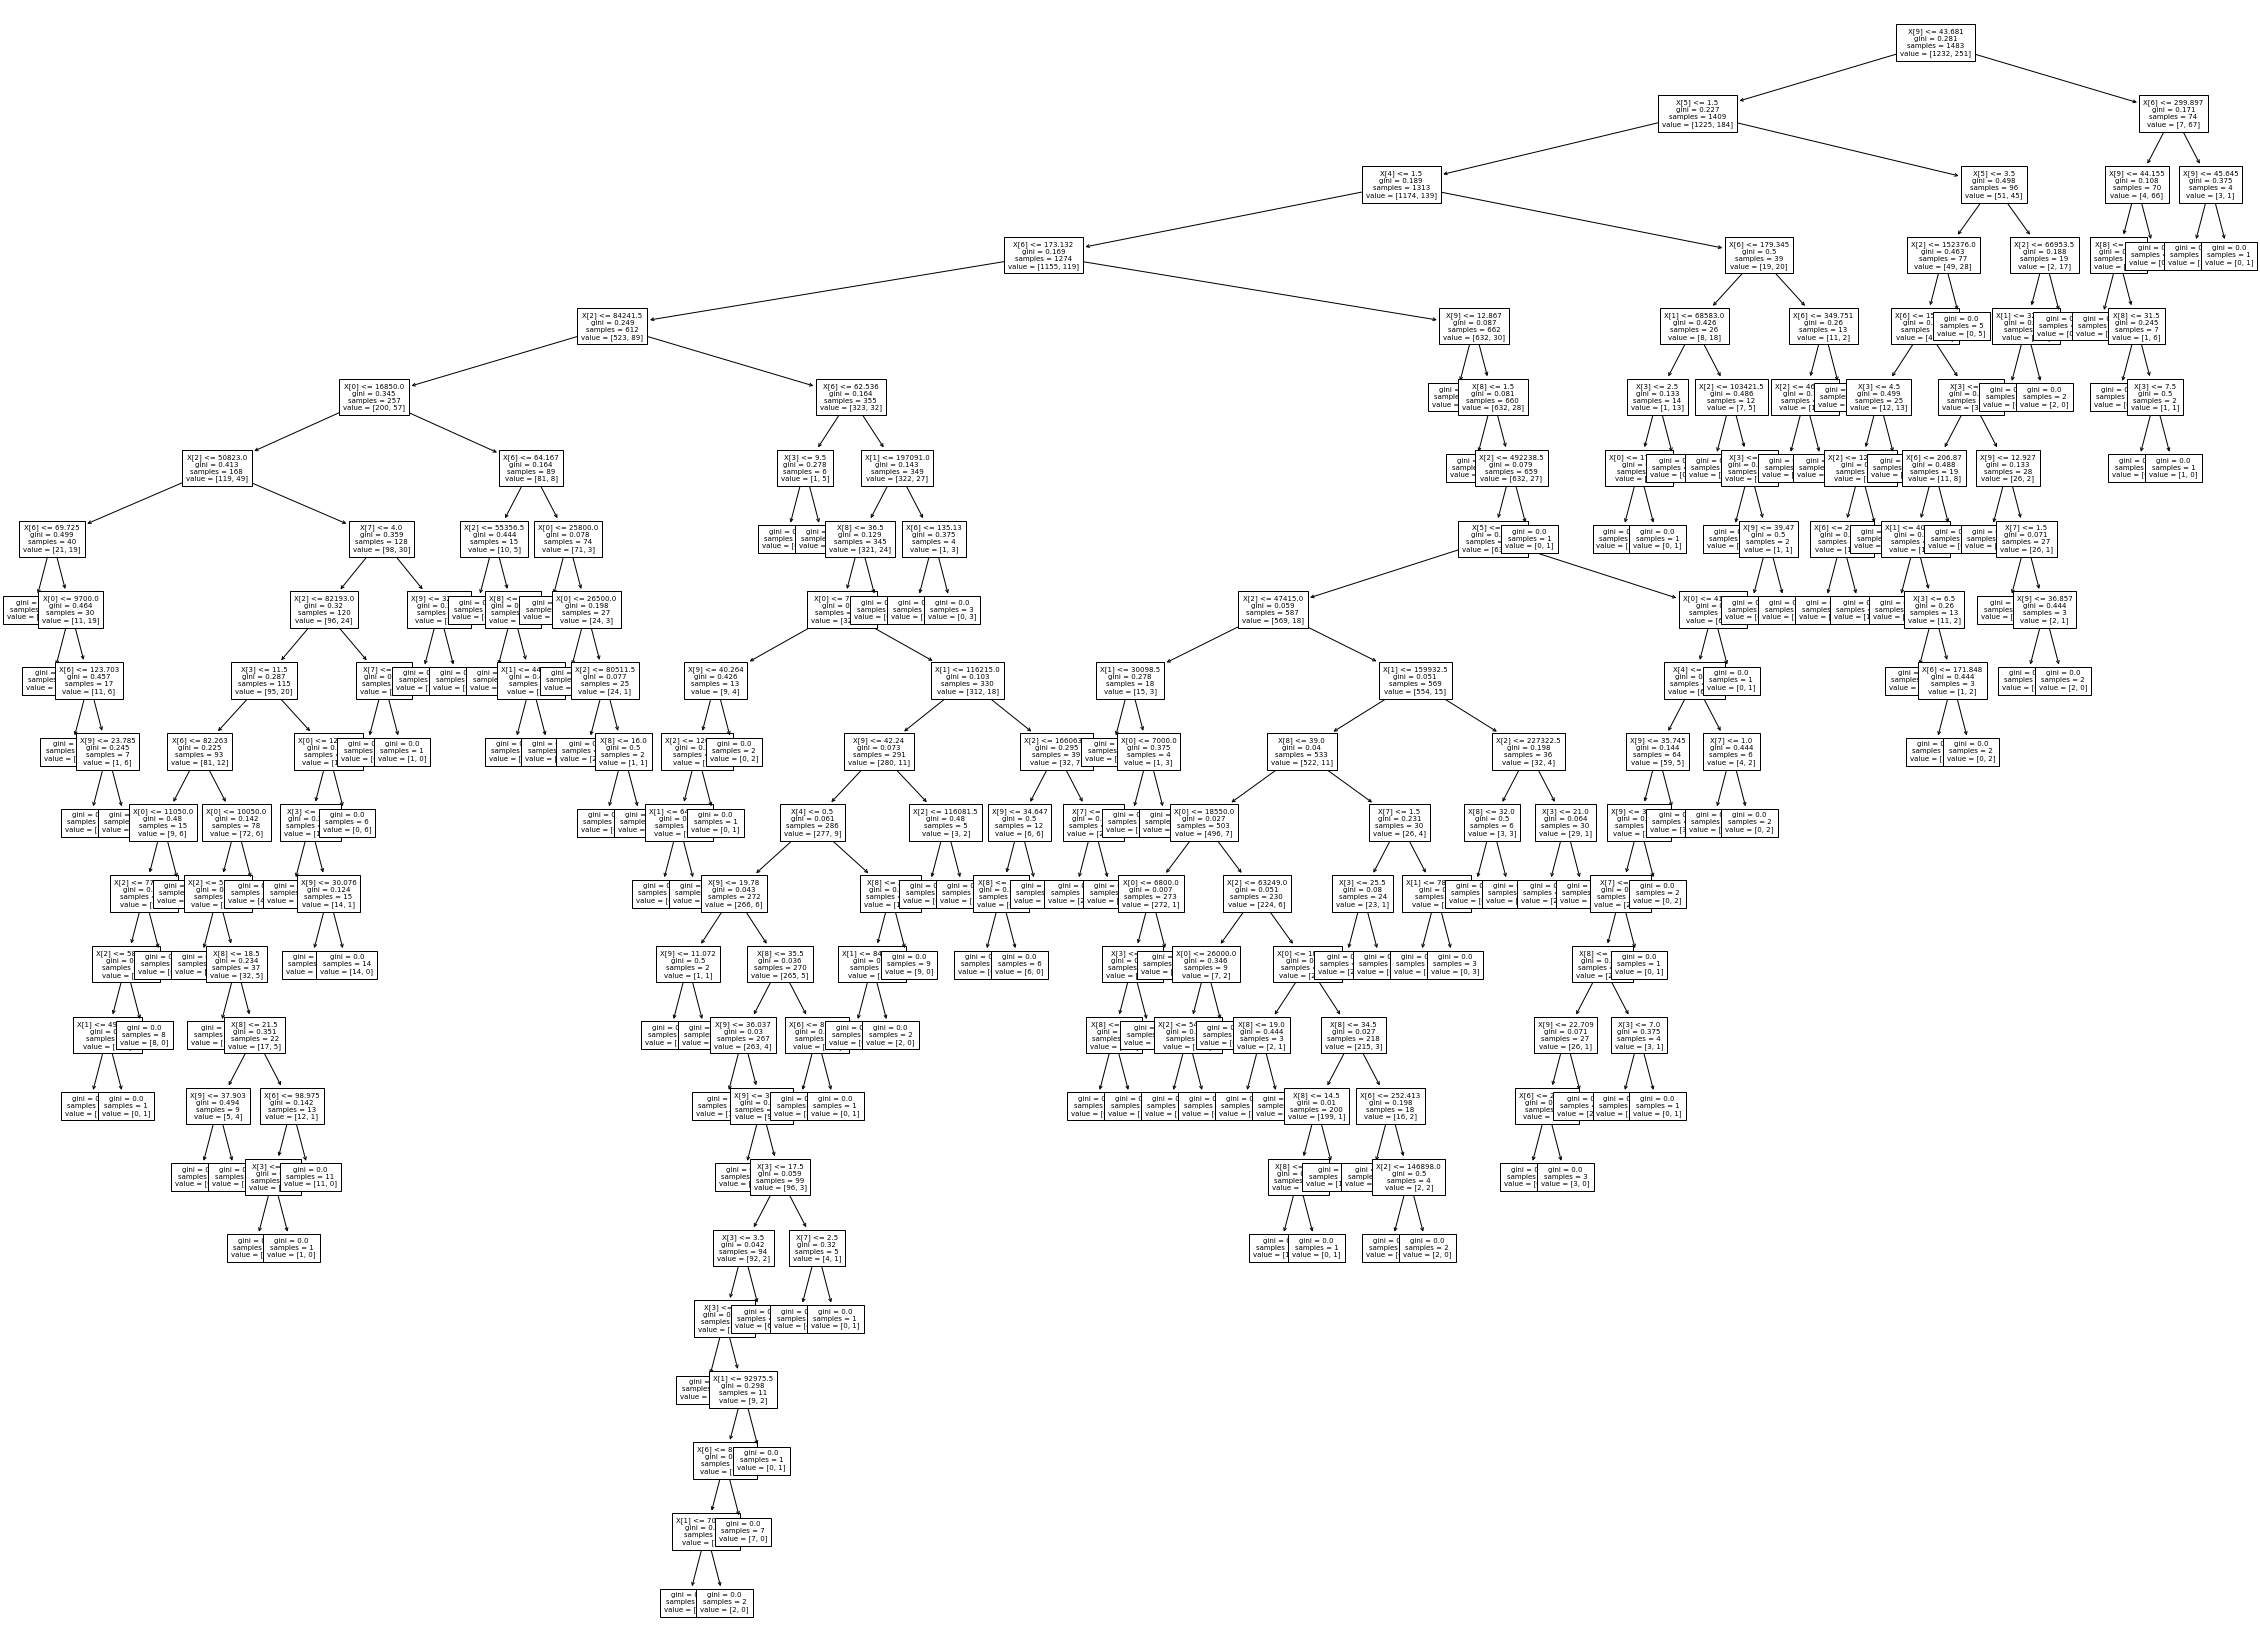

In [27]:
plt.figure(figsize=(40,30))
plot_tree(tree_clf, fontsize=7)
plt.show()

#### Predicción DecisionTreeClassifier (Default) en Train

In [28]:
y_train_pred = tree_clf.predict(X_train)

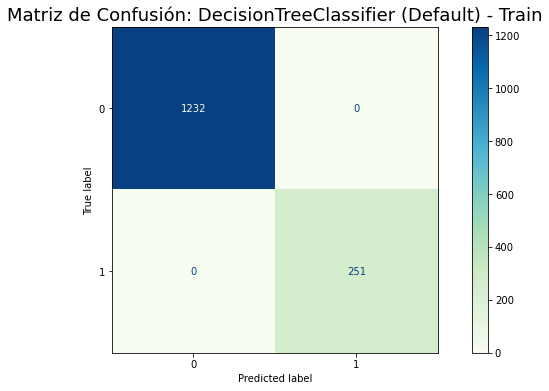

In [29]:
cm_train = confusion_matrix(y_train, y_train_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=tree_clf.classes_)
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Matriz de Confusión: DecisionTreeClassifier (Default) - Train', fontsize=18)
disp.plot(cmap='GnBu', ax=ax)
plt.show()

In [30]:
# Evaluate val
text = "DecisionTreeClassifier (Default) - Reporte de clasificación del conjunto de entrenamiento" 
print(len(text)*"=")
print(text)
print(len(text)*"=")

cr = classification_report(y_train, y_train_pred)
print(cr)

DecisionTreeClassifier (Default) - Reporte de clasificación del conjunto de entrenamiento
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483



#### Predicción DecisionTreeClassifier (Default) en Test

In [31]:
y_test_pred = tree_clf.predict(X_test)

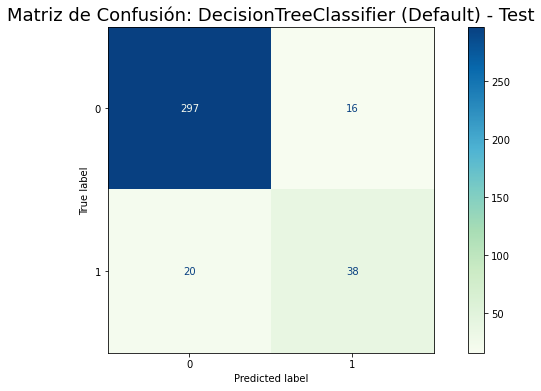

In [32]:
cm_test = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=tree_clf.classes_)
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Matriz de Confusión: DecisionTreeClassifier (Default) - Test', fontsize=18)
disp.plot(cmap='GnBu', ax=ax)
plt.show()

In [33]:
# Evaluate val
text = "DecisionTreeClassifier (Default) - Reporte de clasificación del conjunto de evaluación" 
print(len(text)*"=")
print(text)
print(len(text)*"=")

cr = classification_report(y_test, y_test_pred)
print(cr)

DecisionTreeClassifier (Default) - Reporte de clasificación del conjunto de evaluación
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       313
           1       0.70      0.66      0.68        58

    accuracy                           0.90       371
   macro avg       0.82      0.80      0.81       371
weighted avg       0.90      0.90      0.90       371



#### Conclusión DecisionTreeClassifier (Default)

Los arboles de clasificación son algorítmos que ayudan a predecir una categoría en base a los features. Simplificando en breves palabras, separa el conjunto de datos en varios y pequeños subconjuntos, y luego lo repite. Esto lo hace hasta conseguir la separación que cree adecuada para los datos.

En nuestro modelo por default, el algorítmo hizo overfitting en los datos de entrenamiento, obteniendo un métricas muy exactas. Esto se debe a que el algoritmo separó el conjunto hasta separarlo perfectamente. Al aplicar el modelo para nuestro conjunto de test, los resultados cambian un poco ya que comienza a ser más impresizo en las métricas de precision y recall para nuestra clase 1. Esto es bastante lógico ya que no es bueno hacer overfitting en train, pero nos ayuda a obtener algunos parámetros base para ajustar el modelo.

---

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

#### Entrenamiento DecisionTreeClassifier con GSCV

In [34]:
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(16, 20),
    'max_leaf_nodes': np.arange(110, 140, 2)
}

tree_clf = DecisionTreeClassifier(random_state=15)

grid_tree = GridSearchCV(tree_clf, param_grid_tree, cv = 5, refit = True, n_jobs = 3) 

In [35]:
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=15), n_jobs=3,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([16, 17, 18, 19]),
                         'max_leaf_nodes': array([110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134,
       136, 138])})

In [36]:
print(grid_tree.best_params_) 

{'criterion': 'gini', 'max_depth': 16, 'max_leaf_nodes': 110}


In [37]:
modelo_final = grid_tree.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

Profundidad del árbol: 16
Número de nodos terminales: 110


In [38]:
grid_tree.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': 15,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(random_state=15),
 'n_jobs': 3,
 'param_grid': {'criterion': ['gini', 'entropy'],
  'max_depth': array([16, 17, 18, 19]),
  'max_leaf_nodes': array([110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134,
         136, 138])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

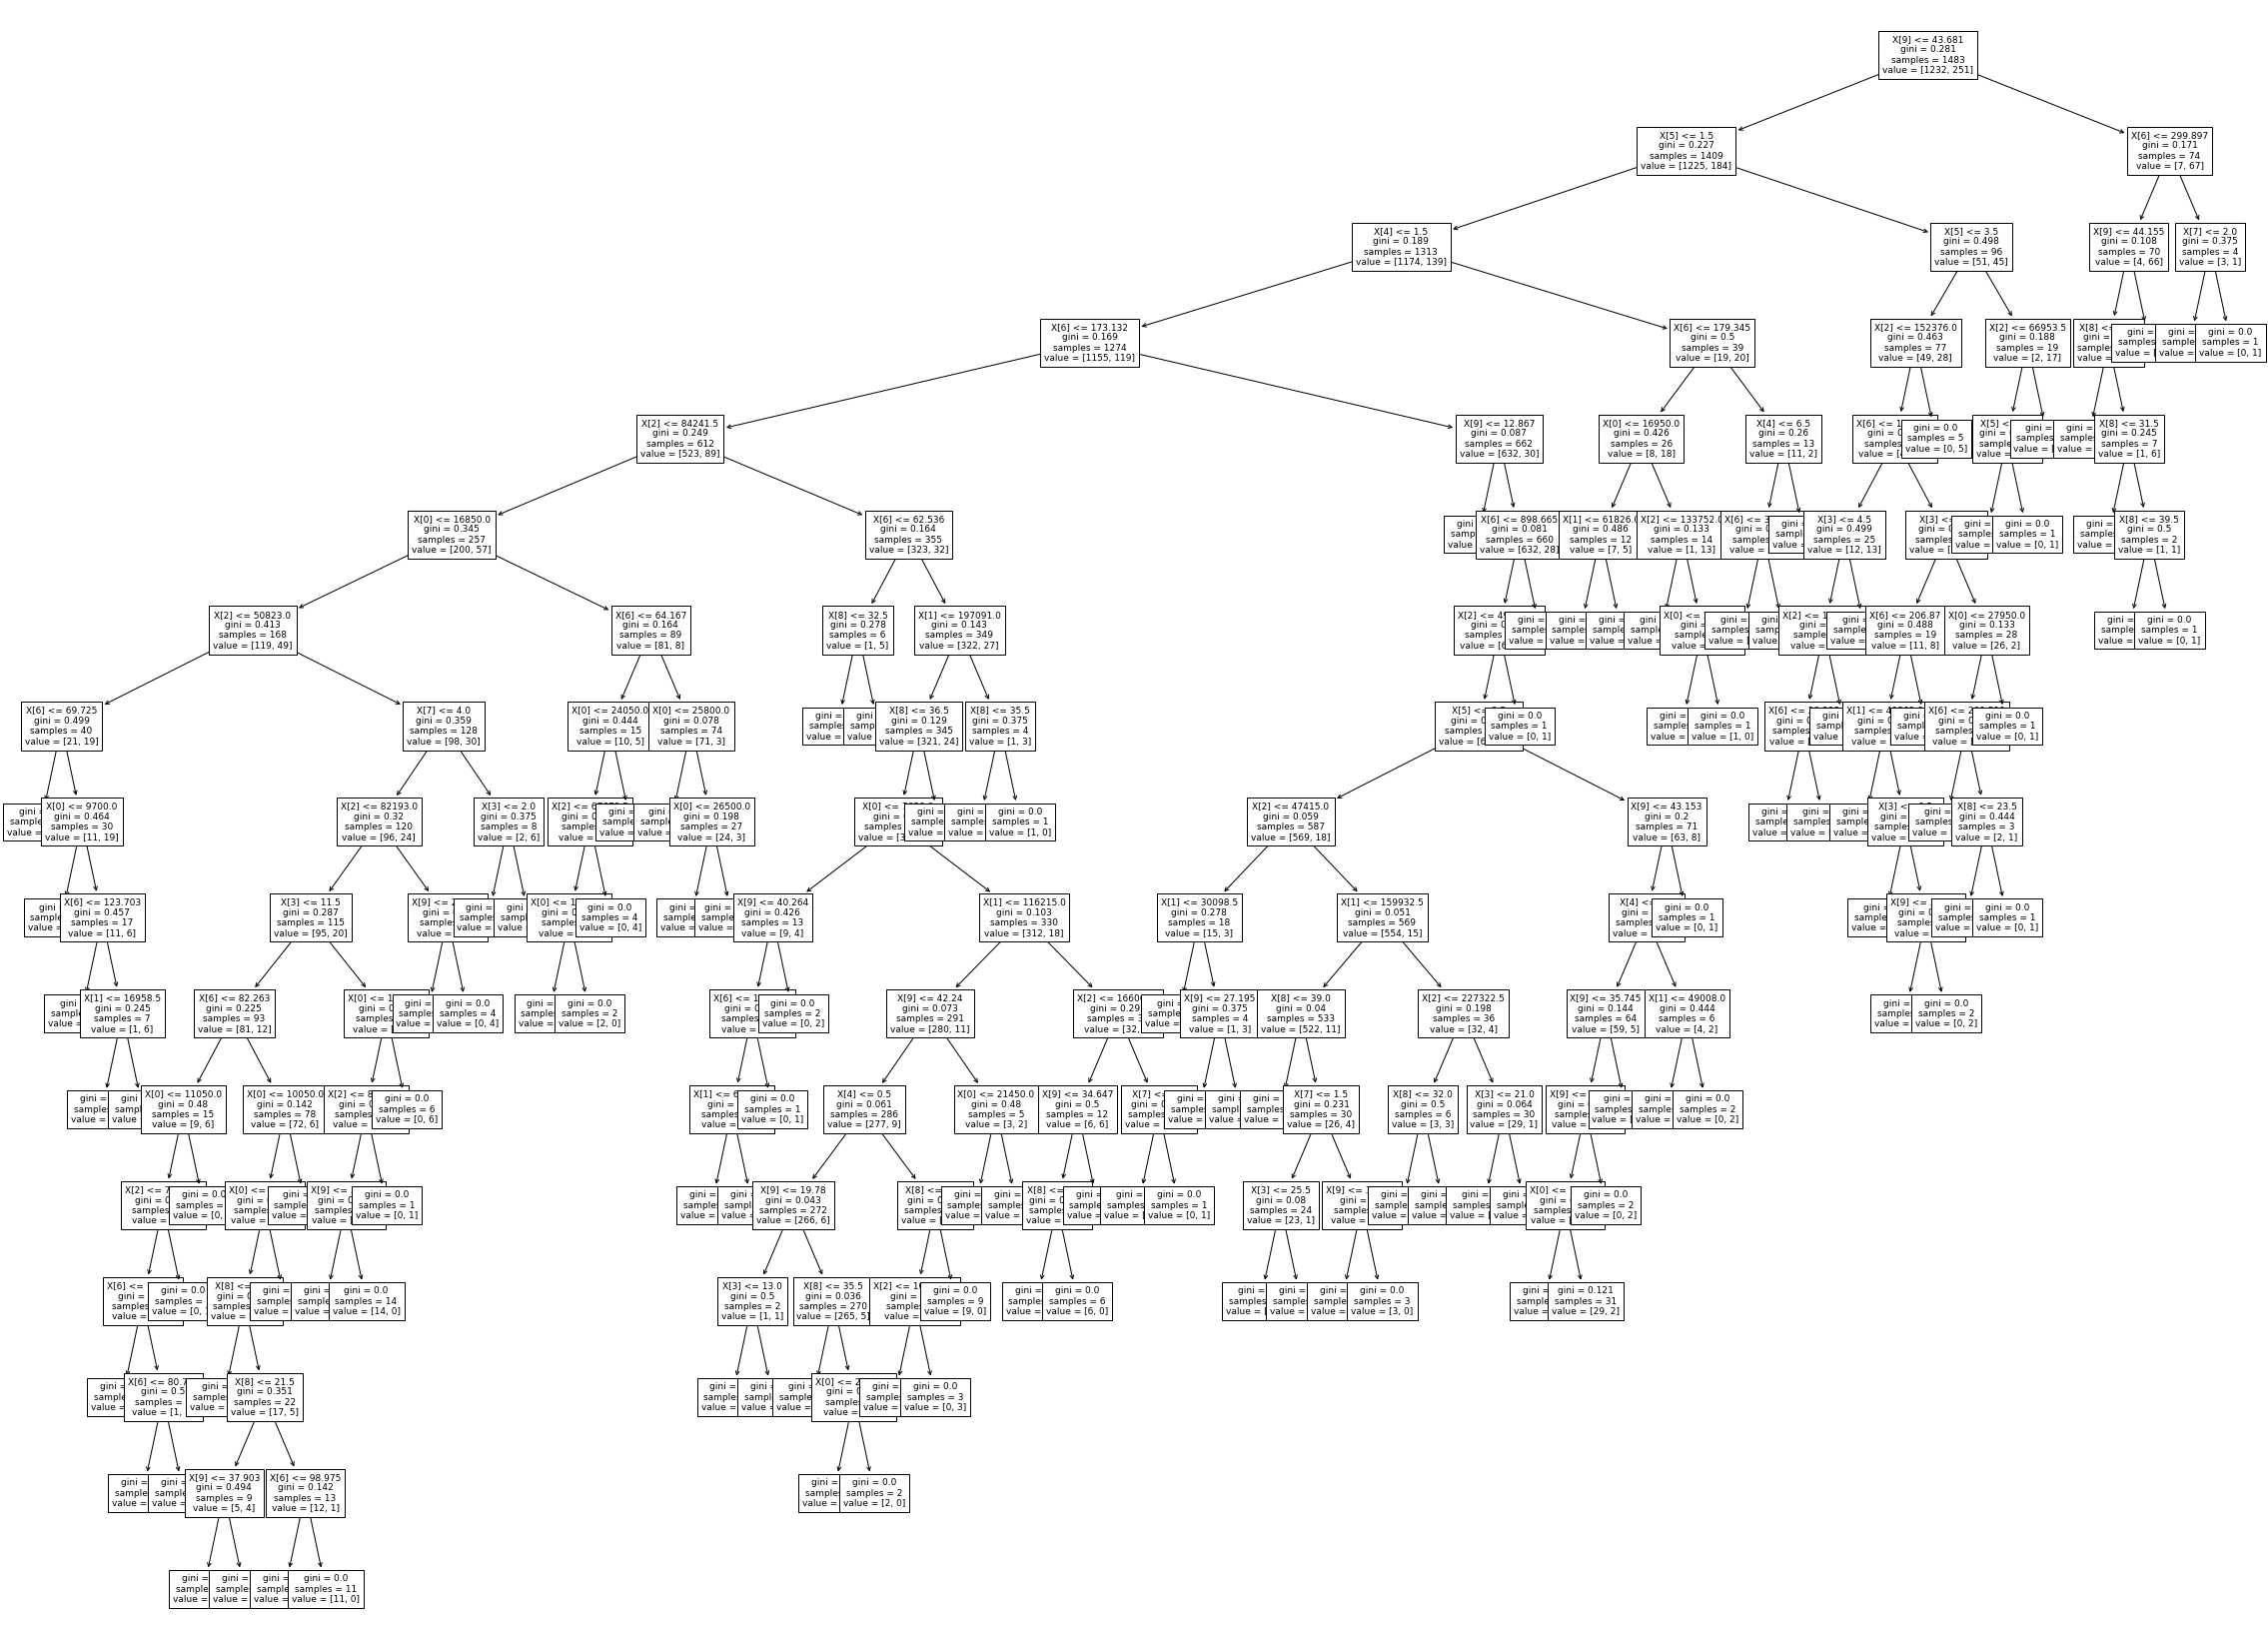

In [39]:
plt.figure(figsize=(40,30))
plot_tree(grid_tree.best_estimator_, fontsize=9)
plt.show()

#### Predicción DecisionTreeClassifier GSCV - Train

In [40]:
y_train_pred = grid_tree.predict(X_train)

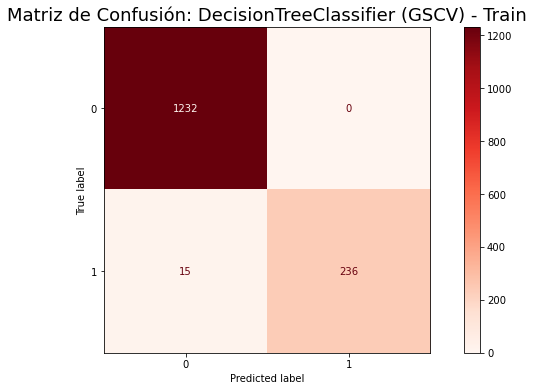

In [41]:
cm_train = confusion_matrix(y_train, y_train_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=grid_tree.classes_)
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Matriz de Confusión: DecisionTreeClassifier (GSCV) - Train', fontsize=18)
disp.plot(cmap='Reds', ax=ax)
plt.show()

In [42]:
# Evaluate val
text = "DecisionTreeClassifier - Reporte de clasificación del conjunto de entrenamiento" 
print(len(text)*"=")
print(text)
print(len(text)*"=")

cr = classification_report(y_train, y_train_pred)
print(cr)

DecisionTreeClassifier - Reporte de clasificación del conjunto de entrenamiento
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1232
           1       1.00      0.94      0.97       251

    accuracy                           0.99      1483
   macro avg       0.99      0.97      0.98      1483
weighted avg       0.99      0.99      0.99      1483



#### Predicción DecisionTreeClassifier GSCV - Test

In [43]:
y_test_pred = grid_tree.predict(X_test)

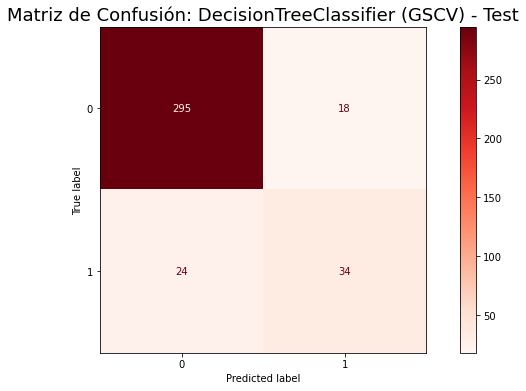

In [44]:
cm_test = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=grid_tree.classes_)
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Matriz de Confusión: DecisionTreeClassifier (GSCV) - Test', fontsize=18)
disp.plot(cmap='Reds', ax=ax)
plt.show()

In [45]:
# Evaluate val
text = "DecisionTreeClassifier - Reporte de clasificación del conjunto de evaluación" 
print(len(text)*"=")
print(text)
print(len(text)*"=")

cr = classification_report(y_test, y_test_pred)
print(cr)

DecisionTreeClassifier - Reporte de clasificación del conjunto de evaluación
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       313
           1       0.65      0.59      0.62        58

    accuracy                           0.89       371
   macro avg       0.79      0.76      0.78       371
weighted avg       0.88      0.89      0.88       371



#### Conclusión DecisionTreeClassifier GSCV

Ajustando un poco los hiperparámetros en el gridsearch CV para el algorítmo DesicionTreeClassifier, conseguimos mejores resultados que por defecto.

Para argumentar lo anterior, como primera instancia, se observa que no termina haciendo overfitting completamente. Aclaramos esto, porque para la clase 0, al ser la mayoritaria, termina llegando al 100% de probabilidades en casi todas las pruebas.

Los parámetros obtenidos en la primer parte de este ejercicio, nos ayudaron como base para elegir los hiperparámetros para el modelo. Los resultados de este fueron mejor, aunque al tener poca cantidad de datos, el algorítmo tiende a hacer overfitting rápidamente. En especial en su clase mayoritaria. 

Podemos concluir que:
* el modelo sería más eficiente al tener más datos para entrenar y testear, 
* el accuracy es similar o muy cercano al SGDClassifier,
* podemos confiar más en las métriacs precision y recall, ya que superan el 50% de probabilidades, aunque seguimos creyendo que para la problemática planteada, sería óptimo usar el recall para la clase 0, para obtener aquellos que si pagarán, 
* podríamos usar este modelo si se duda sobre si un cliente pagará o no un crédito, aunque las posibilidades son bastantes bajas a nuestro parecer. Esto dependerá del experto de dominio a la hora de decidir el riesgo a correr.

---